<a href="https://colab.research.google.com/github/Tejaswini0303/Machine-Learning/blob/main/ADABOOST_on_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

implementing AdaBoost on iris dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix)

In [ ]:
dataset=pd.read_csv("iris.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset.shape

(150, 5)

<function matplotlib.pyplot.show(close=None, block=None)>

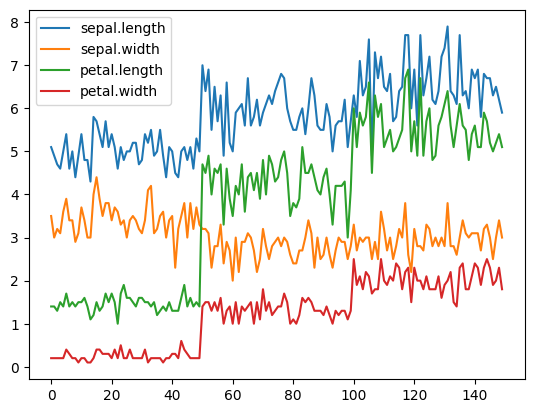

In [ ]:
dataset.plot()
plt.show

In [ ]:
dataset.corr()

<ipython-input-8-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<ipython-input-10-ff670d0f64b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(dataset.corr())


<Axes: >

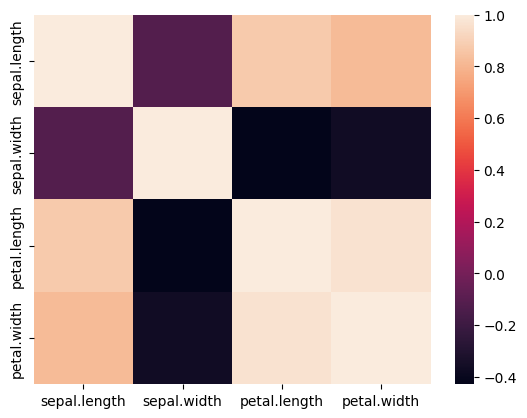

In [ ]:
sb.heatmap(dataset.corr())

In [ ]:
x=dataset.drop("variety",axis=1)

In [ ]:
y=dataset["variety"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [ ]:
x_train.shape

(90, 4)

In [ ]:
model=AdaBoostClassifier(n_estimators=5)

In [ ]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=5)

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.96      0.92      0.94        24
   Virginica       0.90      0.95      0.93        20

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
print(confusion_matrix(y_test,y_predict))

[[16  0  0]
 [ 0 22  2]
 [ 0  1 19]]


implementing AdaBoost on TITANIC dataset

In [ ]:
data=pd.read_csv("titanic.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
data.fillna(data['Age'].median(),inplace=True)

In [ ]:
data['Age'].isnull().sum()

0

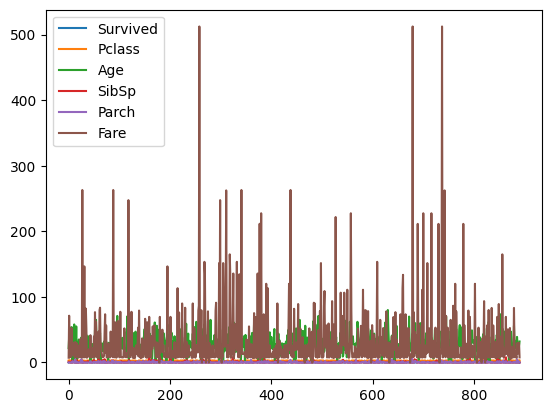

In [ ]:
data.plot()
plt.show()

In [ ]:
Sex_n={'male':1,'female':0}

In [ ]:
Embarked_n={'Q':0,'C':1,'S':2}

In [ ]:
data['Sex'].replace(Sex_n,inplace=True)
data['Embarked'].replace(Embarked_n,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [ ]:
x=data.drop("Survived",axis=1)

In [ ]:
y=data['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [ ]:
model=AdaBoostClassifier(n_estimators=5)

In [ ]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=5)

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict)

0.8095238095238095

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       217
           1       0.81      0.67      0.73       140

    accuracy                           0.81       357
   macro avg       0.81      0.79      0.79       357
weighted avg       0.81      0.81      0.81       357



In [ ]:
print(confusion_matrix(y_test,y_predict))

[[195  22]
 [ 46  94]]


COMPARING WITH DIFFERENT MODELS


In [ ]:
model1=GaussianNB()
model1.fit(x_train,y_train)
y_predict=model1.predict(x_test)
accuracy_score(y_test,y_predict)

0.8011204481792717

In [ ]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_predict=model2.predict(x_test)
accuracy_score(y_test,y_predict)

0.7871148459383753

In [ ]:
model3=KNeighborsClassifier(n_neighbors=3)
model3.fit(x_train,y_train)
y_predict=model3.predict(x_test)
accuracy_score(y_test,y_predict)

0.7086834733893558

In [ ]:
model4=SVC()
model4.fit(x_train,y_train)
y_predict=model4.predict(x_test)
accuracy_score(y_test,y_predict)

0.6918767507002801

In [ ]:
x_data=['NaiveClassifier','Decison Tree','KNN','SVM','ADABOOST']

In [ ]:
y_data=[accuracy_score(y_test,y_predict),accuracy_score(y_test,y_predict),accuracy_score(y_test,y_predict),accuracy_score(y_test,y_predict),accuracy_score(y_test,y_predict)]

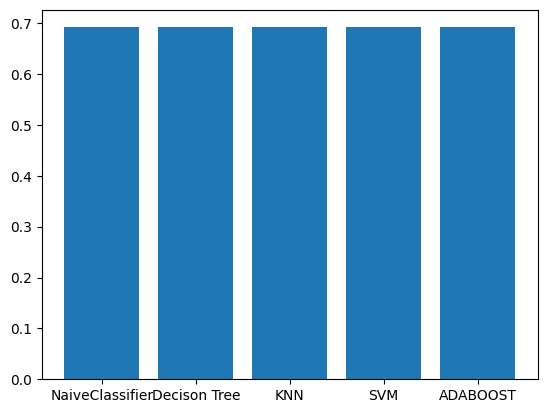

In [ ]:
plt.bar(x_data,y_data)
plt.show()